# Sixt Data Science Lab - Test Task for Data Scientist Job Candidates

## Introduction

In this test task you will have an opportunity to demonstrate your skills of a Data Scientist from various angles - processing data, analyzing and vizalizing it, finding insights, applying predictive techniques and explaining your reasoning about it.

The task is based around a bike sharing dataset openly available at UCI Machine Learning Repository [1].

Please go through the steps below, build up the necessary code and comment on your choices.

## Part 1 - Data Loading and Environment Preparation

**Tasks:**
1. Prepare a Python 3 virtual environment (with virtualenv command). requirements.txt output of pip freeze command should be included as part of your submission.
2. Load the data from UCI Repository and put it into the same folder with the notebook. The link to it is https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset .
3. Load the data into Python runtime as Pandas dataframe.
4. Split the data into two parts. One dataset containing the last 30 days and one dataset with the rest. You will need the dataset with the last 30 days in part 5  

In [ ]:
# TODO: your code comes here
### i used virtualenv wrapper here,


## Data Set Information:

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.


### Attribute Information:

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered


In [1]:
!mkvirtualenv sixt -p python3.6
!workon sixt
!pip install -r requirements.txt
!pip freeze 

In [3]:
### adding data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
!unzip Bike-Sharing-Dataset.zip

--2020-07-11 17:08:57--  https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 279992 (273K) [application/x-httpd-php]
Saving to: ‘Bike-Sharing-Dataset.zip’

Bike-Sharing-Datase 100%[===================>] 273.43K   169KB/s    in 1.6s    

2020-07-11 17:09:00 (169 KB/s) - ‘Bike-Sharing-Dataset.zip’ saved [279992/279992]

Archive:  Bike-Sharing-Dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.plotting import *
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
plt.style.use('ggplot')

In [2]:
day_data = pd.read_csv("day.csv",index_col="instant",parse_dates=["dteday"])
hour_data = pd.read_csv("hour.csv",index_col="instant",parse_dates=["dteday"])


In [3]:
hour_data.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
day_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
last_30_days = day_data.dteday[-30:]
last_30_days_hour_data = hour_data[hour_data.dteday.isin(last_30_days)]
last_30_days_day_data = day_data[day_data.dteday.isin(last_30_days)]
rem_hour_data = hour_data.drop(index=last_30_days_hour_data.index)
rem_days_data = day_data.drop(index=last_30_days_day_data.index)
print(rem_days_data.shape,rem_hour_data.shape)
print(last_30_days_day_data.shape,last_30_days_hour_data.shape)

(701, 15) (16661, 16)
(30, 15) (718, 16)


**Answers / comments / reasoning:**

-

## Part 2 - Data Processing and Analysis

**Tasks:**
1. Perform all needed steps to load and clean the data. Please comment the major steps of your code.
2. Visualise rentals of bikes per day.
3. Assume that each bike has exactly maximum 12 rentals per day.
    * Find the maximum number of bicycles `nmax` that was needed in any one day.
    * Find the 95%-percentile of bicycles `n95` that was needed in any one day.
5. Visualize the distribution of the covered days depending on the number of available bicycles (e.g. `nmax` bicycles would cover 100% of days, `n95` covers 95%, etc.)


In [6]:
hour_data.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [7]:
# TODO: your code comes here
## from the description
categorical_features = ['season', 'holiday', 'mnth', 'hr','yr','holiday', 'weekday', 'workingday', 'weathersit']
numerical_features =  ['temp', 'atemp', 'hum', 'windspeed',"casual","registered","cnt"]


In [8]:
hour_data[categorical_features].astype("category").describe()

,season,holiday,mnth,hr,yr,holiday,weekday,workingday,weathersit
count,17379,17379,17379,17379,17379,17379,17379,17379,17379
unique,4,2,12,24,2,2,7,2,4
top,3,0,7,17,1,0,6,1,1
freq,4496,16879,1488,730,8734,16879,2512,11865,11413


In [9]:
hour_data[numerical_features].describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [10]:
print(hour_data.isnull().sum())
print(day_data.isnull().sum())

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


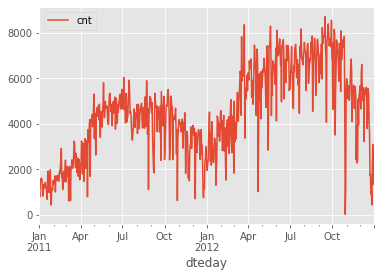

In [11]:
day_data.plot(x="dteday",y="cnt")

In [12]:
nmax = np.ceil(day_data.cnt.max()/12)
print("maximum number of bikes required in any day = %s"%(nmax))

maximum number of bikes required in any day = 727.0


In [13]:
n95 = np.ceil(np.quantile(day_data.cnt/12,q=.95))
print("95 percentile of bikes required in any day = %s"%(n95))

95 percentile of bikes required in any day = 632.0


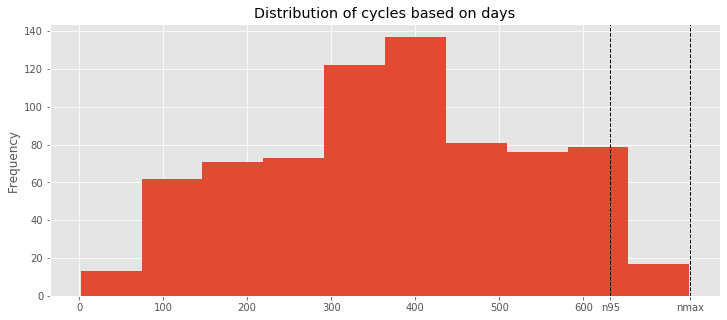

In [14]:
figure = plt.figure(figsize=(12,5))

ax = figure.add_subplot(111)

(day_data.cnt/12).plot(kind="hist",title="Distribution of cycles based on days",ax=ax)

plt.axvline(n95, color='k', linestyle='dashed', linewidth=1)
plt.axvline(nmax, color='k', linestyle='dashed', linewidth=1)
ticks = plt.xticks([0,100,200,300,400,500,600,632,727],["0","100","200","300","400","500","600","n95","nmax"])

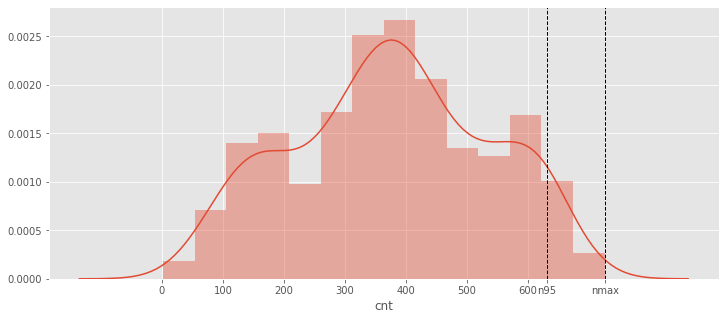

In [15]:
#using seaborn to see pdf in same plot
figure = plt.figure(figsize=(12,5))

ax = figure.add_subplot(111)
sns.distplot(day_data.cnt/12,label = "Distribution of cycles based on days")
plt.axvline(n95, color='k', linestyle='dashed', linewidth=1)
plt.axvline(nmax, color='k', linestyle='dashed', linewidth=1)
ticks = plt.xticks([0,100,200,300,400,500,600,632,727],["0","100","200","300","400","500","600","n95","nmax"])

**Answers / comments / reasoning:**

- no data cleaning 
-maximum number of bikes required in any day = 727.0
-95 percentile of bikes required in any day = 632.0



## Part 3 - Building prediction models

**Tasks:**
1. Define a test metric for predicting the daily demand for bike sharing, which you would like to use to measure the accuracy of the constructed models, and explain your choice.
2. Build a demand prediction model with Random Forest, preferably making use of following python libraries: scikit-learn. 
3. Report the value of the chosen test metric on the provided data. 

In [16]:
# TODO: your code comes here
categorical_features = ['season', 'holiday', 'mnth', 'hr','yr','holiday' ,'weekday', 'workingday', 'weathersit']
numerical_features =  ['temp', 'hum', 'windspeed']
target_features = ["casual","cnt"]
## just creating new features as target feature

In [17]:
corr = hour_data[numerical_features].corr()
corr.style.background_gradient(cmap='coolwarm')

,temp,hum,windspeed
temp,1,-0.0698814,-0.0231253
hum,-0.0698814,1,-0.290105
windspeed,-0.0231253,-0.290105,1


In [18]:
corr = hour_data[target_features].corr()
corr.style.background_gradient(cmap='coolwarm')

,casual,cnt
casual,1,0.694564
cnt,0.694564,1


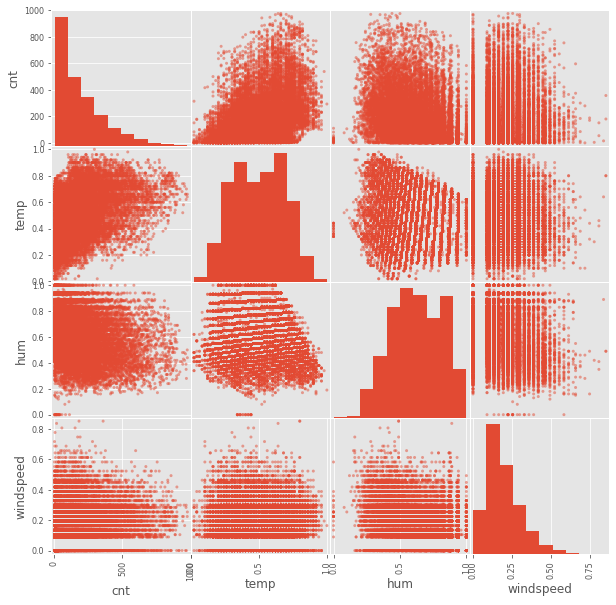

In [19]:
op = scatter_matrix(hour_data[[target_features[-1]]+numerical_features],figsize=(10,10))

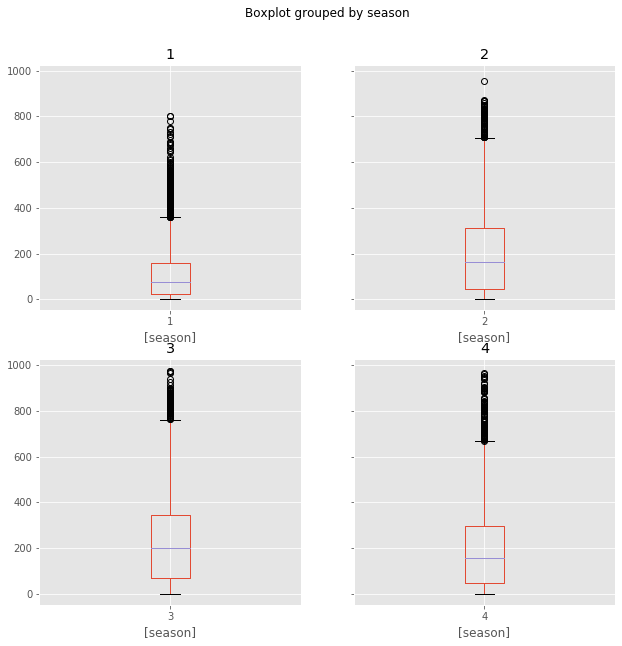

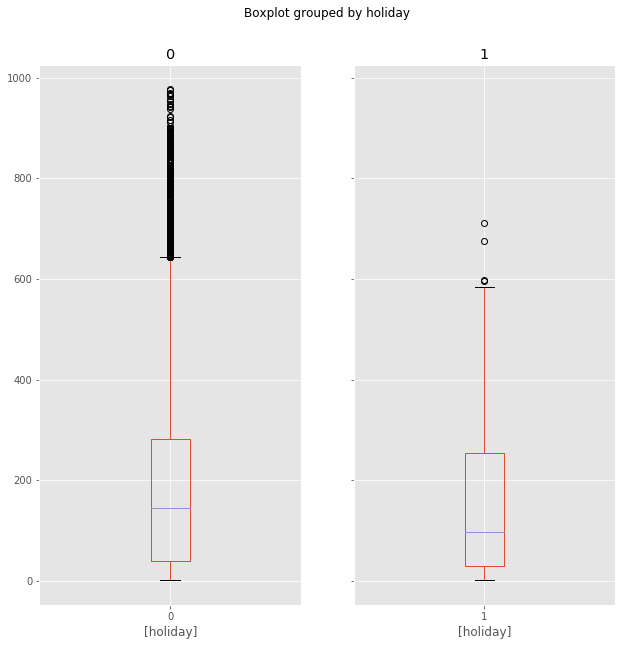

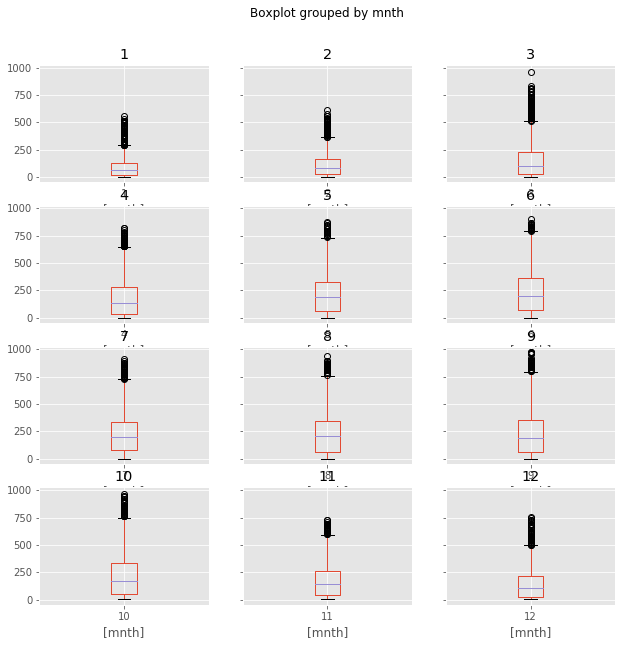

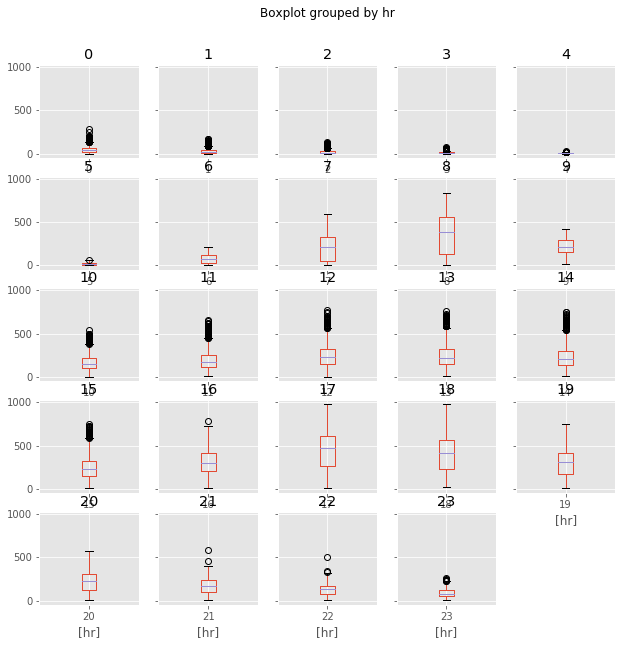

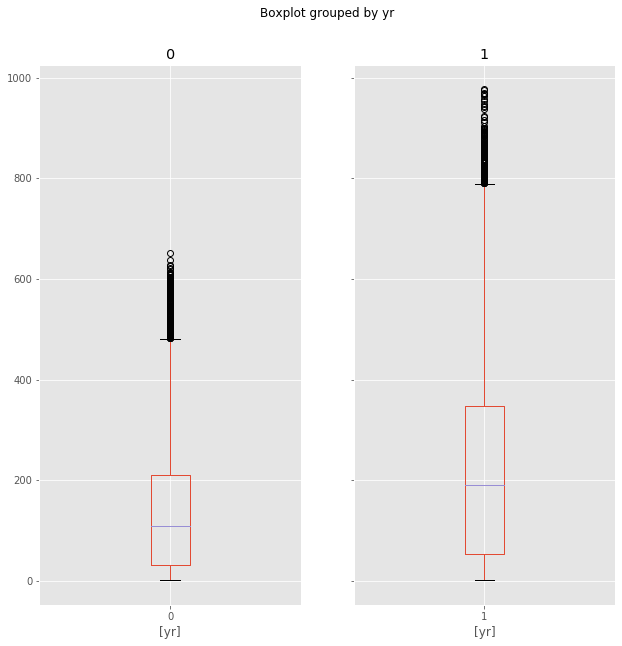

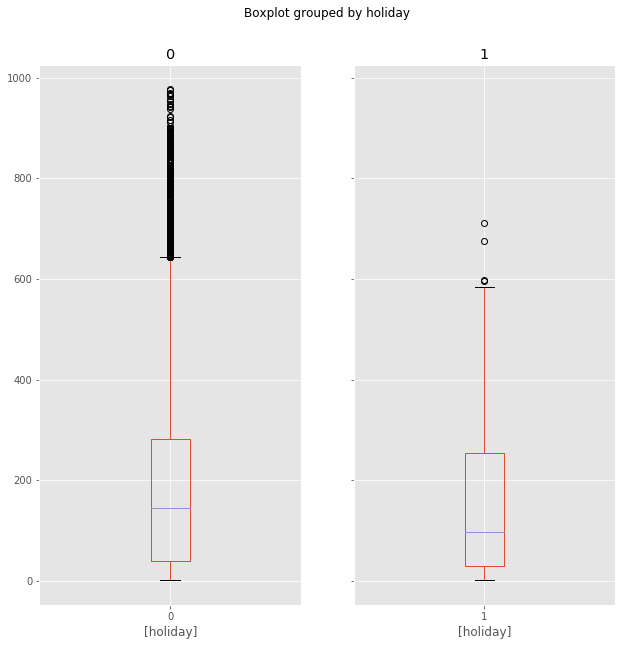

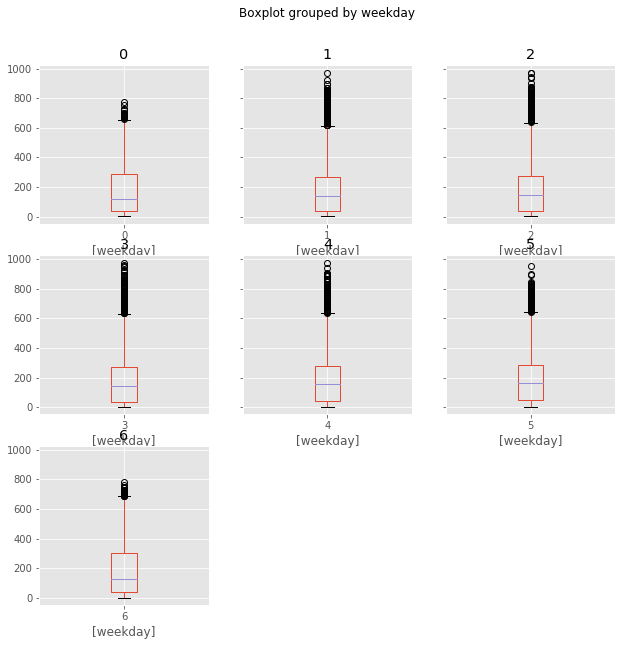

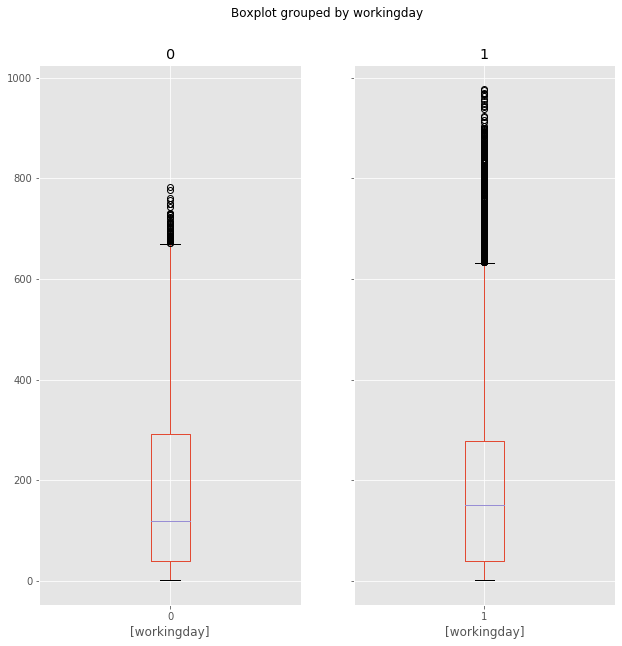

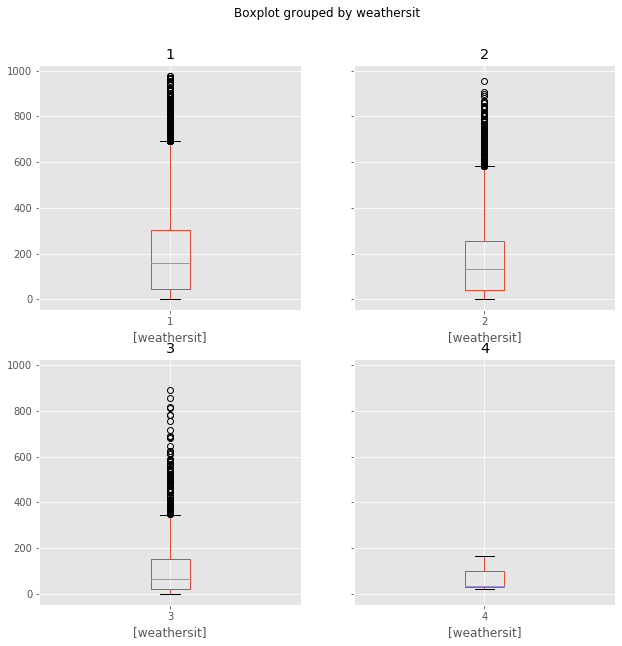

In [20]:
for cat in categorical_features:
    op = hour_data[[cat,target_features[-1]]].groupby(cat).boxplot(by=cat,figsize=(10,10))

In [21]:
unique_values_categ = {}
for i in categorical_features:
    unique_values_categ[i] = hour_data[i].unique()
print(unique_values_categ)

{'season': array([1, 2, 3, 4]), 'holiday': array([0, 1]), 'mnth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), 'hr': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23]), 'yr': array([0, 1]), 'weekday': array([6, 0, 1, 2, 3, 4, 5]), 'workingday': array([0, 1]), 'weathersit': array([1, 2, 3, 4])}


In [22]:
# since all  values are 0-indexed, so there's no need fo label encoding
categorical_feat_index = [idx  for idx,col in enumerate(hour_data.columns) if col in categorical_features]
one_enc = OneHotEncoder(categorical_features=range(len(categorical_features)),sparse=False)
one_enc.fit(hour_data[categorical_features+numerical_features])
transformed_data = one_enc.transform(rem_hour_data[categorical_features+numerical_features])


/home/prateek/.virtualenvs/cv_p36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/prateek/.virtualenvs/cv_p36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [23]:

reg = RandomForestRegressor()

reg.fit(transformed_data,rem_hour_data.cnt)

/home/prateek/.virtualenvs/cv_p36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [24]:
cnt_pred = reg.predict(one_enc.transform(last_30_days_hour_data[categorical_features+numerical_features]))

In [25]:
feature_importances = {}
current_idx = 0
for idx,i in enumerate(categorical_features):
    feature_importances[i] = reg.feature_importances_[current_idx:current_idx+unique_values_categ[i].shape[0]].sum()
    current_idx = current_idx+unique_values_categ[i].shape[0]

for idx,i in enumerate(numerical_features):
    feature_importances[i] = reg.feature_importances_[current_idx]
    current_idx+1
    

In [26]:
pd.DataFrame(feature_importances.values(),\
             index=feature_importances.keys(),columns=["importance"]).sort_values(by =["importance"],ascending=False)

,importance
hr,0.440499
temp,0.155304
hum,0.155304
windspeed,0.155304
workingday,0.090628
yr,0.078794
season,0.020854
weekday,0.017879
mnth,0.017765
weathersit,0.012077


In [13]:
np.sqrt(mean_squared_error(last_30_days_hour_data.cnt,cnt_pred))

75.00152737534815

**Answers / comments / reasoning:**
1. atemp and temp are highly correlated, instead of feeling we will take ideal values temp
2. for target variable registerd and actual user count(cnt) are highly correlated, here we will take only cnt
3. from categorical variable  whenever there's extreme condition like late night in a day or heavy rain snowfall or a holiday, demand is not even low but it is controlled(as all the data is withing upper whiskers)
4. we generally use R2 to  measure deviation from mean values, it generally used to define variance explained by model, mean square error to get squared error from actual values, its variant such as log mse if values are non negative or  large, rmse if we want output to be same units as input, in this case we will use rmse. 

## Part 4 - Fine-tuning of one of the models

**Tasks:**
1. Take one of the above constructed models and finetune its most important hyperparameters
2. Explain your choice for the hyperparameters
3. Report the improvement of your test metric

In [15]:
# TODO: your code comes here
n_estimators = list(range(100,2000,10))
max_features = ['auto', 'sqrt']
max_depth = list(range(5,100,5))+[None]
min_samples_split = [2, 4,8,10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

reg = RandomForestRegressor()
model_opt = RandomizedSearchCV(estimator = reg, param_distributions = params, n_iter = 100, \
                               cv = 3, verbose=2, random_state=0,n_jobs=-1)
model_opt.fit(one_enc.transform(rem_hour_data[categorical_features+numerical_features]),rem_hour_data.cnt)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.4min
/home/prateek/.virtualenvs/cv_p36/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 30.6min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [18]:
model_opt.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=85,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1850,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [16]:
cnt_pred = model_opt.predict(one_enc.transform(last_30_days_hour_data[categorical_features+numerical_features]))
np.sqrt(mean_squared_error(last_30_days_hour_data.cnt,cnt_pred))

74.86036961579781

**Answers / comments / reasoning:**

Not much improvement

-best solution may come by reducing number of features.

## Part 5 - Optimise (revenue - cost) by adapting number of bicycles
**Tasks:**
1. Assume that the revenue per rental is x (your own assumed number).
2. Each bicycle has costs of y per day (your own assumed number).
3. Determine residuals from your test set (after predicting demand of bike sharing). Consider the residuals as random shocks affecting the average values and resulting in real observed values. Assume this random variable is gaussian distributed. Calculate mean and standard deviation and use it as approximation for a gaussian distribution where you can sample from.
4. Simulate the profit with a fixed number of `nmax` (from part 2) bicycles for the next 30 days given that the real observed values are expected to be different from average predicted values. Calculate the demand by adding the simulated residuals to calculated expected values from the data you put aside in part 1.
5. Use grid search along the number of available bikes to find the optimal number of bikes to obtain highest profit (revenue - cost) from simulations.


<BarContainer object of 718 artists>

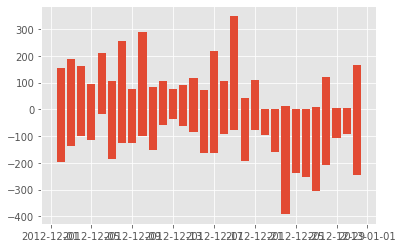

In [58]:
# TODO: your code comes here

rev_per_rental = 10
per_day_cost = 1
random_shocks = last_30_days_hour_data.cnt - cnt_pred
plt.bar(last_30_days_hour_data.dteday,random_shocks)

In [59]:
mu = np.mean(random_shocks)
sigma = np.std(random_shocks)
dist = np.random.normal(mu,sigma,last_30_days_hour_data.shape[0])

In [60]:
simulated_val = nmax+dist

In [78]:
simulated_profit = last_30_days_hour_data.cnt*rev_per_rental -nmax*per_day_cost

simulated_profit = simulated_profit.apply(lambda x: x if x>0 else 0)

In [89]:
demand = np.ceil(cnt_pred+dist)
demand[demand<0] = 0


In [99]:
itr = 10000
num_bikes = list(range(1,nmax+1))
opt_num = 300
mean_demand = demand.mean()
sigma_demand = demand.std()
max_profit = 0
for num_bike in num_bikes:
    total_profit = []
    for i in range(itr):
        profit = np.random.normal(mean_demand,sigma_demand)*rev_per_rental-num_bike*per_day_cost
        total_profit.append(profit)
    if np.sum(total_profit)>max_profit:
        max_profit = np.sum(total_profit)
        opt_num = num_bike
print("optimum number of bikes %s"%opt_num)
    

optimum number of bikes 8


**Answers / comments / reasoning:**

- grid search is nothing but brute force 

## Part 6 - Reflection / comments

**Tasks:**
(Optional) Please share with us any free form reflection, comments or feedback you have in the context of this test task.

## Submission

Please submit this notebook with your developments in .ipynb and .html formats as well as your requirements.txt file.

## References

[1] Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science. 